# Task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('kc_house_data.csv')

In [4]:
df.shape

(21613, 21)

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [8]:
df.isnull().count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Text(0, 0.5, 'Price')

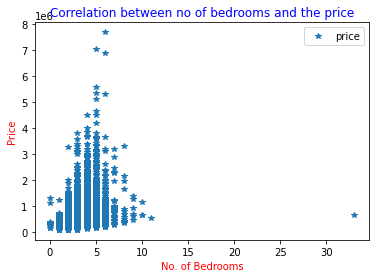

In [10]:
df.plot(x='bedrooms',y='price',style="*")
plt.title("Correlation between no of bedrooms and the price", color='b')
plt.xlabel("No. of Bedrooms",color='r')
plt.ylabel("Price",color='r')

In [11]:
### removing the outlier having the bedroom no > 30


In [12]:
outlier = df.loc[df.bedrooms>30, :].index
df.drop(outlier, axis = 0, inplace = True)

Text(0, 0.5, 'Price')

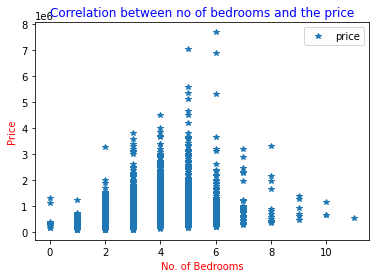

In [13]:
df.plot(x='bedrooms',y='price',style="*")
plt.title("Correlation between no of bedrooms and the price", color='b')
plt.xlabel("No. of Bedrooms",color='r')
plt.ylabel("Price",color='r')

In [14]:
### hence the outlier is removed

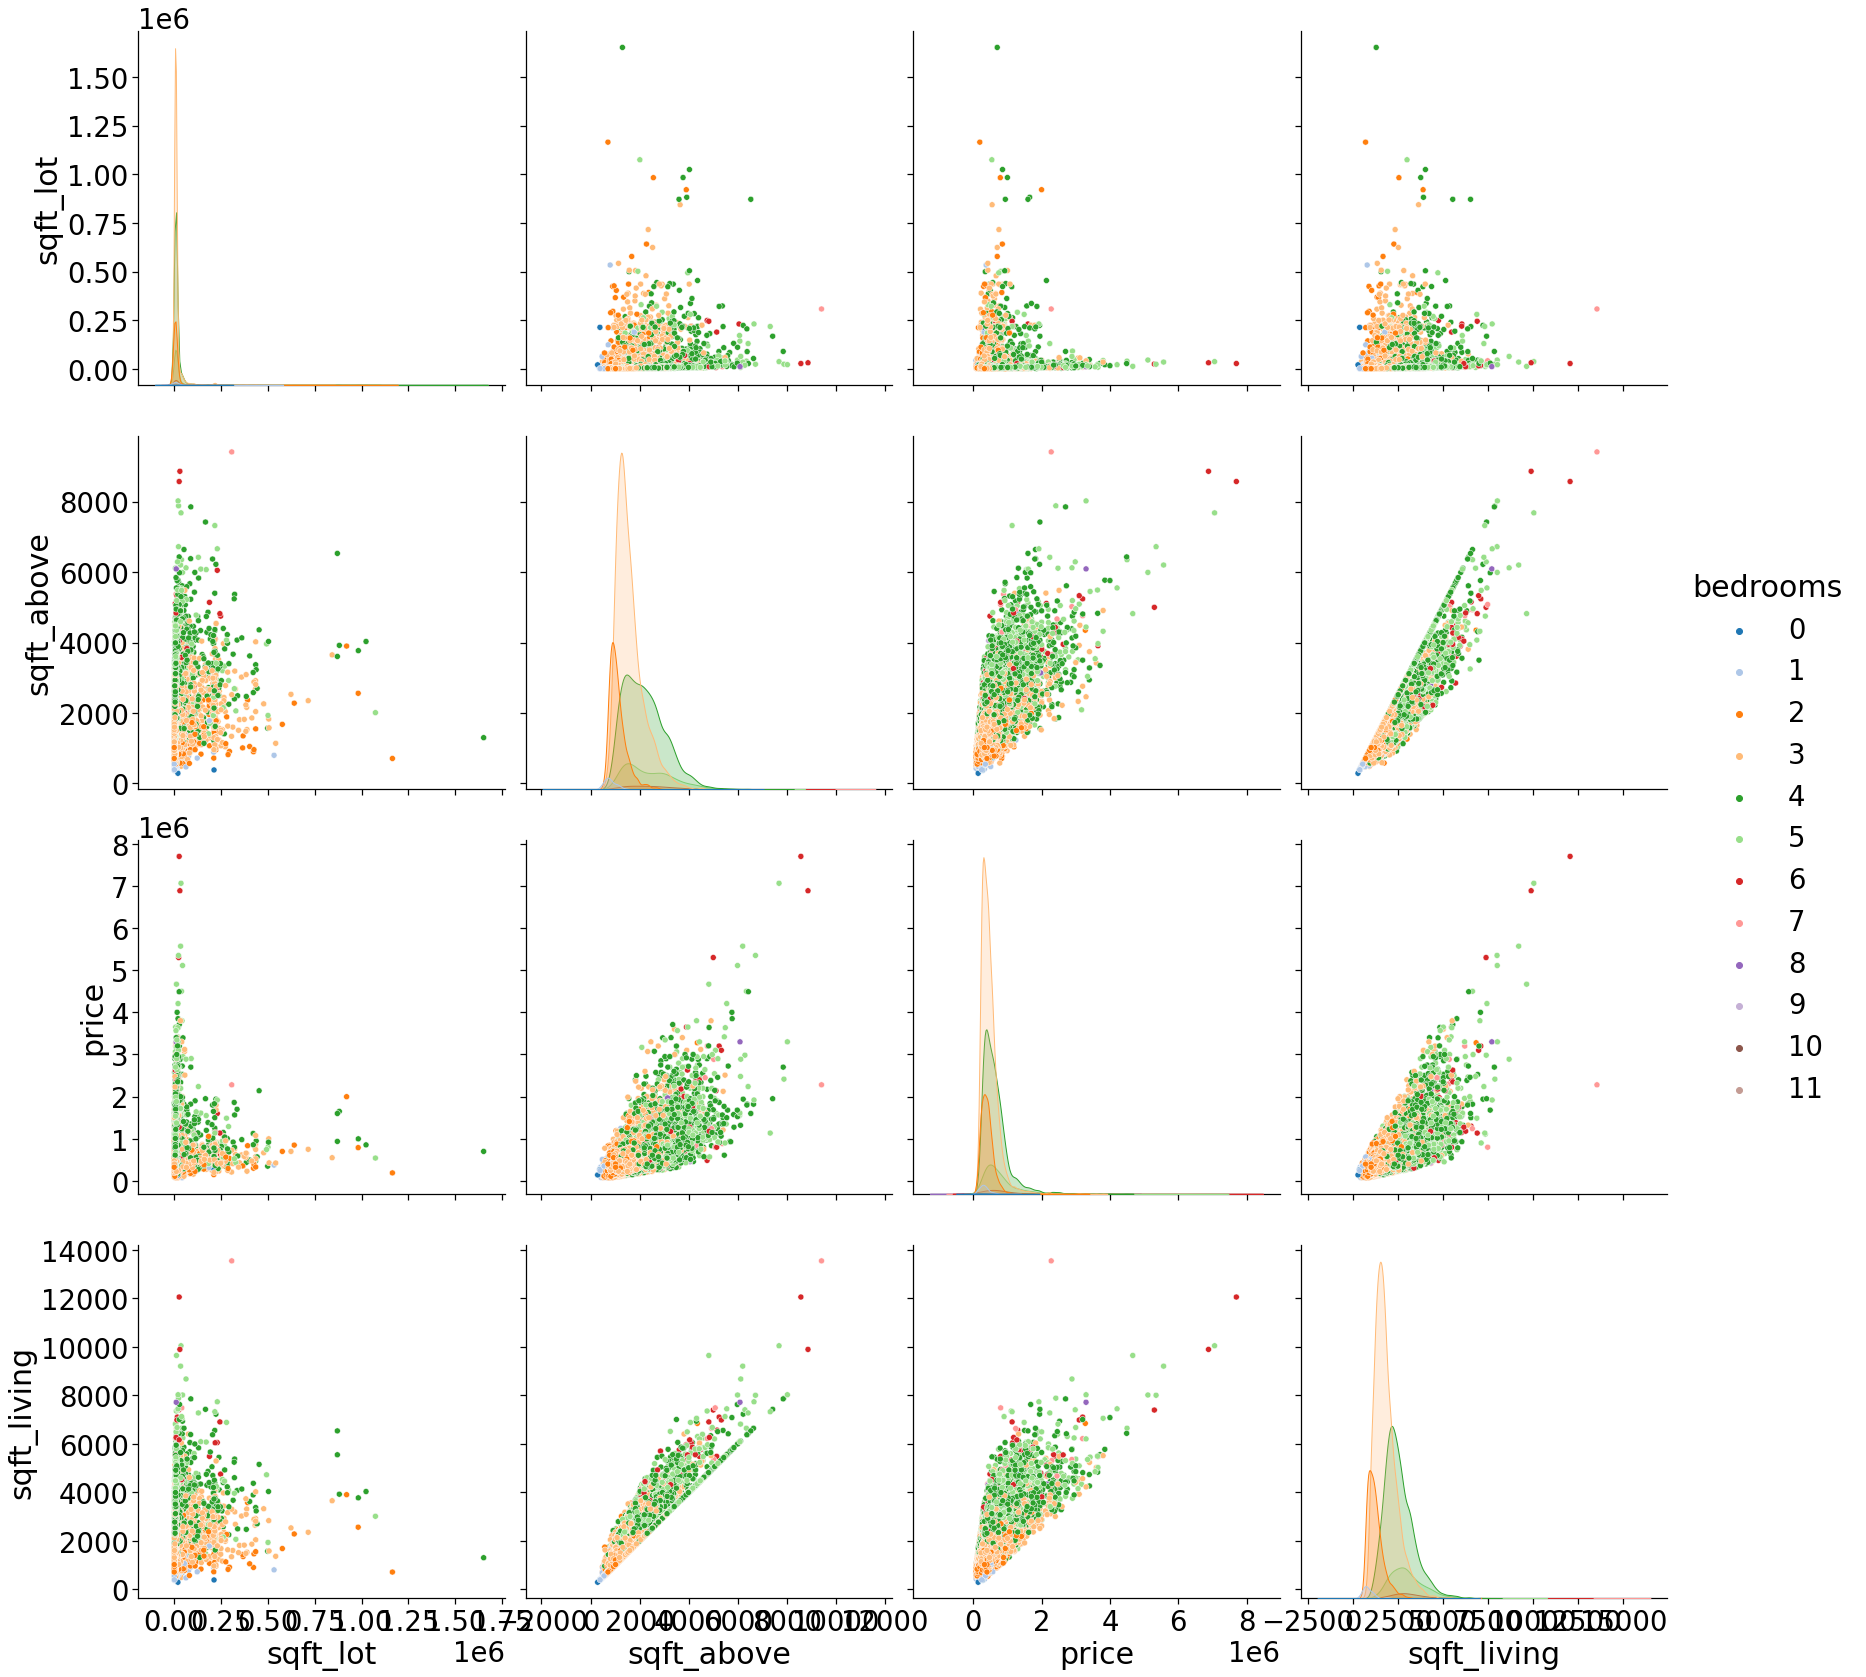

In [15]:
with sns.plotting_context("notebook",font_scale=2.5):
         g = sns.pairplot(df[['sqft_lot','sqft_above','price','bedrooms','sqft_living']],hue='bedrooms', palette='tab20',height=6)

<AxesSubplot:xlabel='condition'>

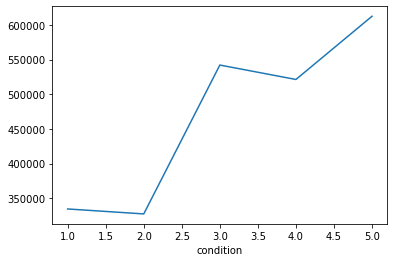

In [16]:
df.groupby('condition').mean()['price'].plot()

In [17]:
#let's head for house priceprediction 

In [18]:
#separating independent and dependent variable
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [19]:
X = df.drop('date',axis = 1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=30)

In [68]:
regression=LinearRegression()

In [69]:
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
print(regression.coef_)

[ 1.00000000e+00 -1.51830244e-14 -4.18890731e-08 -1.15542186e-07
  7.02507201e-11  2.25428864e-13 -4.65976196e-08 -4.70213296e-07
 -3.81276378e-09 -4.90187498e-09  2.13451445e-08  2.63992685e-11
  4.38514517e-11  7.55887956e-10  1.43148522e-11  4.30447727e-10
  7.99446556e-08  6.12457377e-08 -6.41988398e-12  1.21198775e-14]


In [71]:
print(regression.intercept_)


-3.910064697265625e-05


In [72]:
regression_pred=regression.predict(X_test)

In [73]:
regression_pred

array([8.73213068e+09, 1.24500333e+09, 2.76760396e+09, ...,
       1.62607915e+09, 1.23039313e+08, 6.69900061e+09])

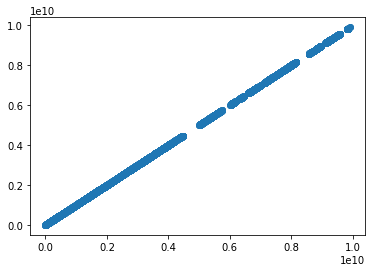

In [74]:
plt.scatter(y_test,regression_pred)

In [75]:
# Residual (calculating error):
residuals=y_test-regression_pred

In [76]:
residuals

array([ 0.00000000e+00, -4.76837158e-07, -4.76837158e-07, ...,
       -4.76837158e-07, -6.85453415e-07,  0.00000000e+00])

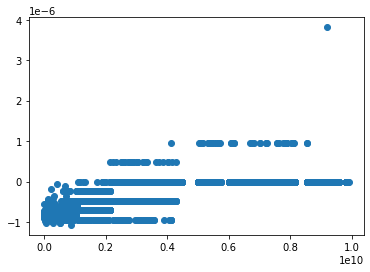

In [77]:
# scatter plot with respect to predictions and residuals:
# uniform distrubutions:
plt.scatter(regression_pred,residuals)

In [78]:
# R2 score  and adjusted r2 score:
from sklearn.metrics import r2_score

In [79]:
score=r2_score(y_test,regression_pred)
print(score)

1.0
